## Observations and Insights
 write at least three observations or inferences that can be made from the data. Include these observations at the top of notebook.
 - 

## Dependencies and starter code

In [186]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
# Merge our two data frames together
combined_studies_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_studies_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [187]:
mice_data_df = combined_studies_data[["Drug Regimen", "Tumor Volume (mm3)", "Sex"]]

In [188]:
mice_data_group = mice_data_df.groupby(["Drug Regimen"])
mice_data_group

## Summary statistics

In [189]:
# Generate a summary statistics table of mean, median, variance,
#standard deviation, and SEM of the tumor volume for each regimen
combined_dr = mice_data_group.agg({'Tumor Volume (mm3)' : ['mean', 'median', 'var', 'std', 'sem']})
combined_dr

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.322552  50.854632  42.351070  6.507770  0.512884
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar plots

In [190]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_regimen_data = mice_data_group["Tumor Volume (mm3)"].count()
drug_regimen_data

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Tumor Volume (mm3), dtype: int64

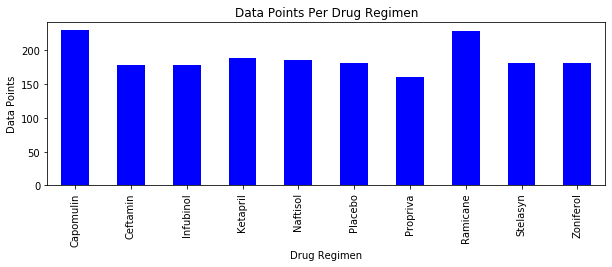

In [191]:
#Generate bar plot using pandas
drug_regimen_data.plot(kind="bar", color="b", figsize=(10,3))

#bar plot details
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")
plt.show()

Text(0, 0.5, 'Data Points')

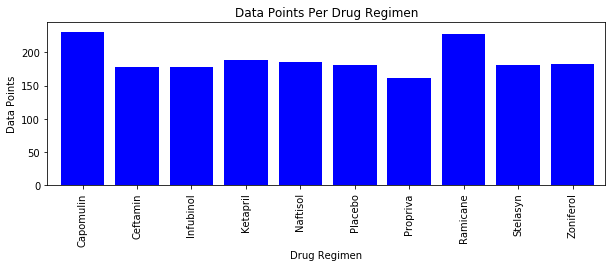

In [192]:
#Generate bar plot using pyplot 
drug_regimen_data = drug_regimen_data.reset_index()

#x_axis is all the drug regimens
x_axis = np.arange(len(mice_data_group))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(10,3))

#bar plot details
plt.bar(x_axis, drug_regimen_data["Tumor Volume (mm3)"], color='b', align="edge")
plt.xticks(tick_locations, drug_regimen_data["Drug Regimen"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(drug_regimen_data["Tumor Volume (mm3)"])+15)
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Data Points")

## Pie plots

In [193]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mice_gender_df = combined_studies_data[["Mouse ID", "Sex"]]
mice_gendermod_df = mice_gender_df.drop_duplicates()
mice_gender_group = mice_gendermod_df.groupby(["Sex"])
mice_gender_data = pd.DataFrame(mice_gender_group["Sex"].count())
remice_gender_data = mice_gender_data.rename(columns={"Sex": "Number of Mice"})

remice_gender_data

,Number of Mice
Sex,
Female,124
Male,125


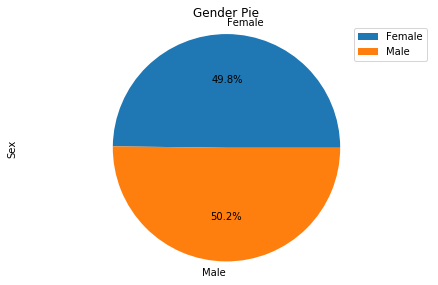

In [194]:
# Create a pie chart based upon the trip duration of that single bike
gender_pie = remice_gender_data.plot(kind='pie', y="Number of Mice", title=("Gender Pie"), autopct="%1.1f%%")
plt.tight_layout()
plt.ylabel('Sex')
plt.axis('equal')
plt.show()

In [195]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
regender_pie = remice_gender_data.reset_index()
regender_pie

,Sex,Number of Mice
0,Female,124
1,Male,125


/opt/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


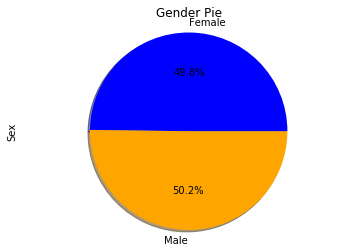

In [196]:
x_axis = remice_gender_data["Number of Mice"]
labels = regender_pie["Sex"]
colors = ["blue", "orange"]
plt.title("Gender Pie")
plt.pie(remice_gender_data, labels=labels, colors=colors, shadow=True, startangle=360, autopct="%1.1f%%")
plt.axis("equal")
plt.ylabel('Sex')
plt.show()

## Quartiles, outliers and boxplots

In [197]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
#Calculate the IQR and quantitatively determine if there are any potential outliers. 
iqr_data_group = combined_studies_data.groupby(["Mouse ID"])
iqr_data_group

In [224]:
#find the last timepoint for each mouse
final_tumor_vol = iqr_data_group["Timepoint"].max().reset_index(name="Timepoint")

In [199]:
#merge the combined data with the last timepoint data
merge_left_df = pd.merge(final_tumor_vol, combined_studies_data, on=["Mouse ID", "Timepoint"], how='left')
merge_left_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


## Capomulin

In [200]:
#find the tumor volume for each drug
capomulin_df = merge_left_df[merge_left_df['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
capomulin_df.head()

19    38.982878
24    38.939633
61    30.485985
64    37.074024
66    40.159220
Name: Tumor Volume (mm3), dtype: float64

In [201]:
quartiles = capomulin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [202]:
ramicane_df = merge_left_df[merge_left_df['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
ramicane_df.head()

6     38.407618
7     43.047543
10    38.810366
12    32.978522
33    38.342008
Name: Tumor Volume (mm3), dtype: float64

In [203]:
quartiles = ramicane_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [204]:
infubinol_df = merge_left_df[merge_left_df['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
infubinol_df.head()

0     67.973419
1     65.525743
11    57.031862
13    66.083066
27    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [205]:
quartiles = infubinol_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [206]:
ceftamin_df = merge_left_df[merge_left_df['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']
ceftamin_df.head()

3     62.999356
21    45.000000
22    56.057749
25    55.742829
58    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [207]:
quartiles = ceftamin_df.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


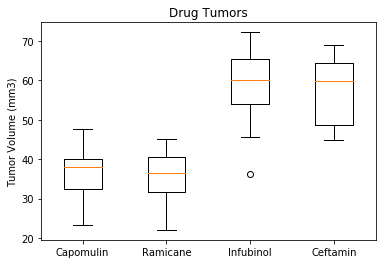

In [208]:
data = [capomulin_df, ramicane_df, infubinol_df, ceftamin_df]

fig1, ax1 = plt.subplots()
ax1.set_title('Drug Tumors')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])
plt.show()

## Line and scatter plots

In [209]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_only_df = combined_studies_data.loc[combined_studies_data["Drug Regimen"] == "Capomulin",:]
cap_only_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [210]:
cap_mouse_line = cap_only_df.loc[cap_only_df["Mouse ID"] == "s185"]
cap_mouse_line

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


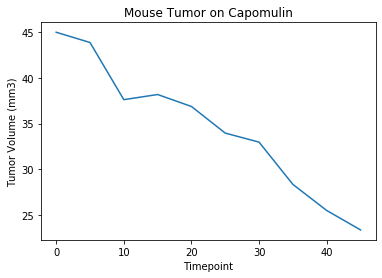

In [211]:
x_axis_data = cap_mouse_line["Timepoint"]
y_axis_data = cap_mouse_line["Tumor Volume (mm3)"]
plt.plot(x_axis_data, y_axis_data)
plt.title('Mouse Tumor on Capomulin')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [212]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_mouse_av = cap_only_df.groupby(['Mouse ID']).mean()
cap_mouse_av

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,
b128,9.0,22.0,22.5,41.963636,0.70
b742,7.0,21.0,22.5,40.083699,0.00
f966,16.0,17.0,10.0,36.505973,0.00
g288,3.0,19.0,22.5,41.990097,0.80
g316,22.0,22.0,22.5,44.613344,1.00
i557,1.0,24.0,22.5,44.805810,0.20
i738,23.0,20.0,22.5,39.141053,0.60
j119,7.0,23.0,22.5,44.465236,0.60
j246,21.0,21.0,17.5,43.216925,0.25


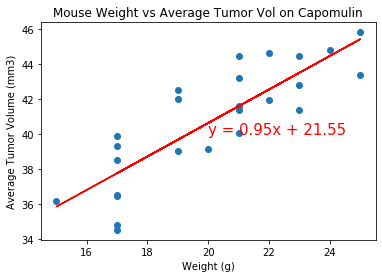

In [222]:
x_value = cap_mouse_av['Weight (g)']
y_value = cap_mouse_av['Tumor Volume (mm3)']

plt.scatter(x_value, y_value)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs Average Tumor Vol on Capomulin')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(x_value,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")


plt.show()

In [223]:
# Calculate the correlation coefficient and linear regression model for mouse
#weight and average tumor volume for the Capomulin regimen
weight = cap_mouse_av['Weight (g)']
volume = cap_mouse_av['Tumor Volume (mm3)']
correlation = st.pearsonr(weight,volume)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84
